In [2]:
import data_proc
data = data_proc.get_CIFAR10_data("./data/cifar-10-batches-py")

In [39]:
import importlib
import solver
from solver import Solver
import model
from model import ThreeLayerModel
from model import multiple_layer_model
import matplotlib.pyplot as plt    
importlib.reload(module = model)
importlib.reload(solver)


<module 'solver' from 'c:\\Users\\yinzhitao\\Desktop\\2Term3Year\\CV\\cv-pj1\\solver.py'>

### 三层神经网络测试
使用的参数如下：
- 默认正则化参数，为0.0
- 学习率，输入为1e-3
- 学习率衰减，输入为0.95
- 梯度下降方式：SGD
- 隐藏层大小为100

训练的结果被存入cache/ThreeLayerModel文件夹中。

In [32]:
m1 = ThreeLayerModel()
solver = None
s1 = Solver(model = m1, data = data,
                update_rule='sgd',
                optim_config={
                'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=10, batch_size=100,
                print_every=100,
                checkpoint_name = './cache/ThreeLayerModel/')
s1.train()

(Iteration 1 / 4900) loss: 2.300968
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_0.pkl"
(Epoch 0 / 10) train acc: 0.164000; val_acc: 0.164000
(Iteration 101 / 4900) loss: 1.789385
(Iteration 201 / 4900) loss: 1.595010
(Iteration 301 / 4900) loss: 1.539033
(Iteration 401 / 4900) loss: 1.548290
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_1.pkl"
(Epoch 1 / 10) train acc: 0.477000; val_acc: 0.441000
(Iteration 501 / 4900) loss: 1.560493
(Iteration 601 / 4900) loss: 1.667483
(Iteration 701 / 4900) loss: 1.542046
(Iteration 801 / 4900) loss: 1.532764
(Iteration 901 / 4900) loss: 1.583245
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_2.pkl"
(Epoch 2 / 10) train acc: 0.468000; val_acc: 0.460000
(Iteration 1001 / 4900) loss: 1.386633
(Iteration 1101 / 4900) loss: 1.365148
(Iteration 1201 / 4900) loss: 1.429112
(Iteration 1301 / 4900) loss: 1.408995
(Iteration 1401 / 4900) loss: 1.361214
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_3.pkl"
(Epoch 3 / 10) train acc:

Text(0.5, 1.0, '三层神经网络训练损失')

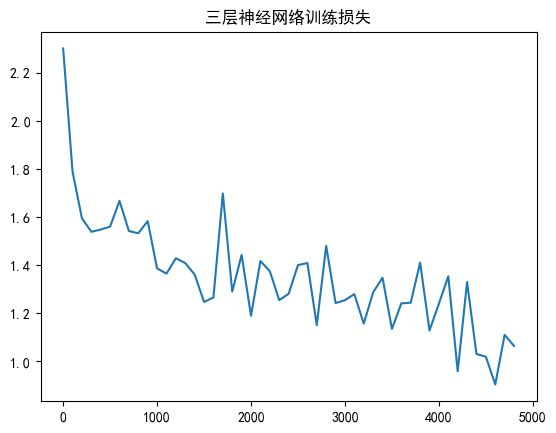

In [43]:
plt.plot([i for i in range(1,len(s1.loss_history),100)],s1.loss_history[::100])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('三层神经网络训练损失')

Text(0.5, 1.0, '三层神经网络')

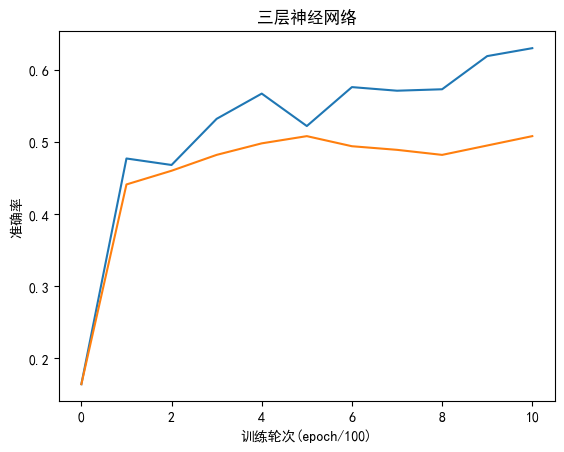

In [47]:
plt.plot(s1.train_acc_history,label = '训练集准确率')
plt.plot(s1.val_acc_history,label = '验证集准确率')
plt.xlabel('训练轮次(epoch/100)')
plt.ylabel('准确率')
plt.title('三层神经网络')

### 读取指定路径存储的模型参数，并且调用test()函数验证是否读取成功。输出的结果为在测试集上测试的准确率。

In [35]:

s3 = Solver(data = data,load_checkpoint_path='cache\ThreeLayerModel\_epoch_10.pkl')
s3.test()

Loaded checkpoint from "cache\ThreeLayerModel\_epoch_10.pkl" (epoch 10)
[Warning] 传入的data参数将被忽略，使用检查点中的数据
test dataset accuracy:0.508,test_data_size:None 


0.508

### 多重感知机的训练。除了回合数调整至20外，参数使用的与三层神经网络一致。

In [49]:
g = multiple_layer_model()
solver = None
s2 = Solver(model = g, data = data,
                update_rule='sgd',
                optim_config={
                'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=20, batch_size=100,
                print_every=100,
                checkpoint_name = './cache/MLP/')
s2.train()

(Iteration 1 / 9800) loss: 2.302555
Saving checkpoint to "./cache/MLP/_epoch_0.pkl"
(Epoch 0 / 20) train acc: 0.109000; val_acc: 0.111000
(Iteration 101 / 9800) loss: 2.302518
(Iteration 201 / 9800) loss: 2.302320
(Iteration 301 / 9800) loss: 2.302148
(Iteration 401 / 9800) loss: 2.301918
Saving checkpoint to "./cache/MLP/_epoch_1.pkl"
(Epoch 1 / 20) train acc: 0.229000; val_acc: 0.208000
(Iteration 501 / 9800) loss: 2.301392
(Iteration 601 / 9800) loss: 2.299169
(Iteration 701 / 9800) loss: 2.297045
(Iteration 801 / 9800) loss: 2.283419
(Iteration 901 / 9800) loss: 2.236497
Saving checkpoint to "./cache/MLP/_epoch_2.pkl"
(Epoch 2 / 20) train acc: 0.180000; val_acc: 0.182000
(Iteration 1001 / 9800) loss: 2.181211
(Iteration 1101 / 9800) loss: 2.152945
(Iteration 1201 / 9800) loss: 2.104893
(Iteration 1301 / 9800) loss: 2.141824
(Iteration 1401 / 9800) loss: 2.098378
Saving checkpoint to "./cache/MLP/_epoch_3.pkl"
(Epoch 3 / 20) train acc: 0.242000; val_acc: 0.237000
(Iteration 1501 / 9

Text(0.5, 1.0, '多层神经网络')

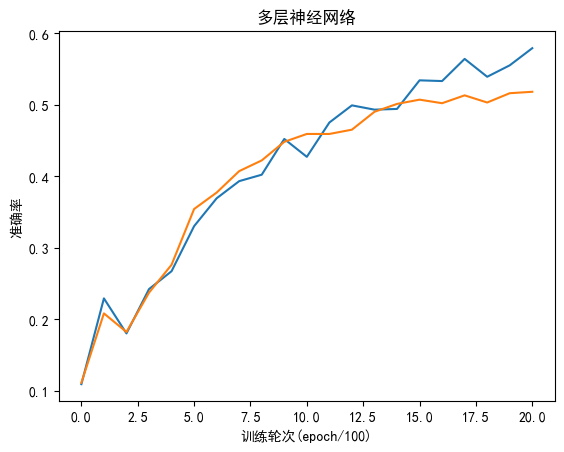

In [52]:
plt.plot(s2.train_acc_history,label = '训练集准确率')
plt.plot(s2.val_acc_history,label = '验证集准确率')
plt.xlabel('训练轮次(epoch/100)')
plt.ylabel('准确率')
plt.title('多层神经网络')

In [51]:
s4 = Solver(data = data,load_checkpoint_path='./cache/MLP/_epoch_20.pkl')
s4.test()

Loaded checkpoint from "./cache/MLP/_epoch_20.pkl" (epoch 20)
[Warning] 传入的data参数将被忽略，使用检查点中的数据
test dataset accuracy:0.501,test_data_size:None 


0.501

In [ ]:
import hyperparams_find
importlib.reload(hyperparams_find)
best_s,record = hyperparams_find.find_best_hyper_params()
best_s.checkpoint_name = './cache/best_model_3layer/'
checkpoint = best_s._save_checkpoint()

(Iteration 1 / 4900) loss: 2.300089
(Epoch 0 / 10) train acc: 0.126000; val_acc: 0.130000
(Iteration 101 / 4900) loss: 1.947218
(Iteration 201 / 4900) loss: 1.736103
(Iteration 301 / 4900) loss: 1.781629
(Iteration 401 / 4900) loss: 1.534962
(Epoch 1 / 10) train acc: 0.447000; val_acc: 0.406000
(Iteration 501 / 4900) loss: 1.431434
(Iteration 601 / 4900) loss: 1.509203
(Iteration 701 / 4900) loss: 1.394327
(Iteration 801 / 4900) loss: 1.491923
(Iteration 901 / 4900) loss: 1.313371
(Epoch 2 / 10) train acc: 0.477000; val_acc: 0.464000
(Iteration 1001 / 4900) loss: 1.501020
(Iteration 1101 / 4900) loss: 1.477978
(Iteration 1201 / 4900) loss: 1.393787
(Iteration 1301 / 4900) loss: 1.421603
(Iteration 1401 / 4900) loss: 1.316496
(Epoch 3 / 10) train acc: 0.516000; val_acc: 0.486000
(Iteration 1501 / 4900) loss: 1.255225
(Iteration 1601 / 4900) loss: 1.371851
(Iteration 1701 / 4900) loss: 1.330990
(Iteration 1801 / 4900) loss: 1.327981
(Iteration 1901 / 4900) loss: 1.396617
(Epoch 4 / 10) t

In [57]:
print(record)

{(0.001, 0.9, 64, 0.001): 0.52}
